# TASK 1: Branch Prediction (Oracle)

Результаты реализации идеального conditional branch predictor с 0 mpki.

In [39]:
from my_utils import *

CHAMPSIM_PATH = '../..'
TRACES_PATH = '../task_traces'

WARMUP_INSTRUCTIONS = 5_000_000
SIMULATION_INSTRUCTIONS = 20_000_000

In [ ]:
base_metrics = obtain_perf_metrics(TRACES_PATH, CHAMPSIM_PATH, "champsim_config.json")

In [ ]:
oracle_metrics = obtain_perf_metrics(TRACES_PATH, CHAMPSIM_PATH, "champsim_config_oracle.json")

In [ ]:
hp_metrics = obtain_perf_metrics(TRACES_PATH, CHAMPSIM_PATH, "champsim_config_hp.json")

In [47]:
import pandas as pd

pd.DataFrame(base_metrics).to_csv("base_metrics.csv")
pd.DataFrame(hp_metrics).to_csv("hp_metrics.csv")
pd.DataFrame(oracle_metrics).to_csv("oracle_metrics.csv")

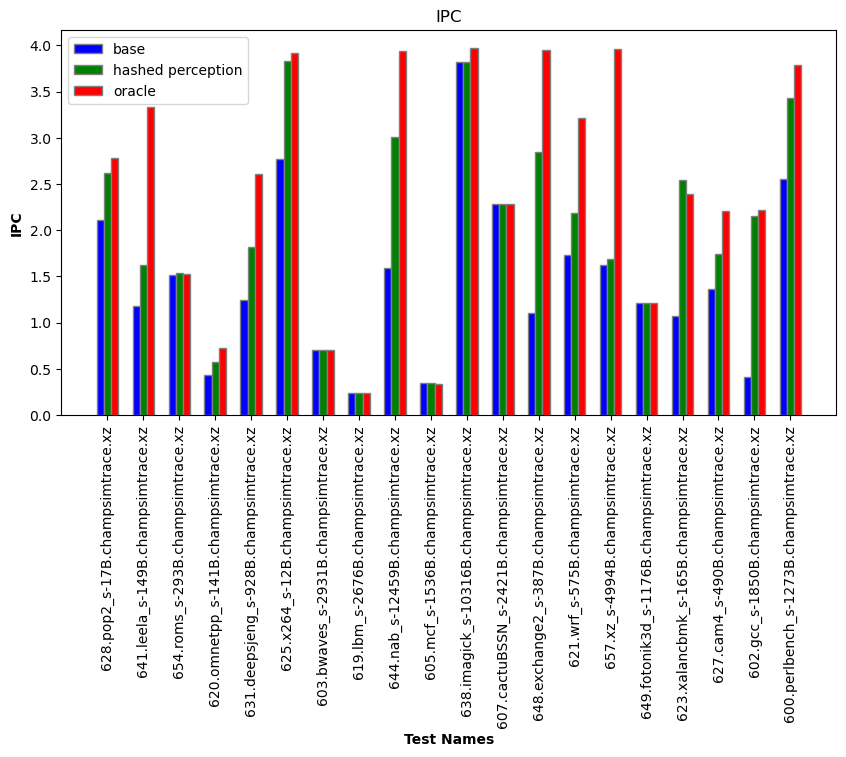

In [44]:
plot_metric([base_metrics, hp_metrics, oracle_metrics], 0, "IPC", ["base", "hashed perception", "oracle"])

In [54]:
base_ipc_s = list(map(lambda x: x[1][0], base_metrics.items()))
oracle_ipc_s = list(map(lambda x: x[1][0], oracle_metrics.items()))
total = 0
for b, o in zip(base_ipc_s, oracle_ipc_s):
  total += o / b - 1
print(f"Average IPC increase {total / len(base_ipc_s) * 100} %")

Average IPC increase 87.50486315902573 %


> Какой прирост IPC получился?

В среднем увеличился на 87%.

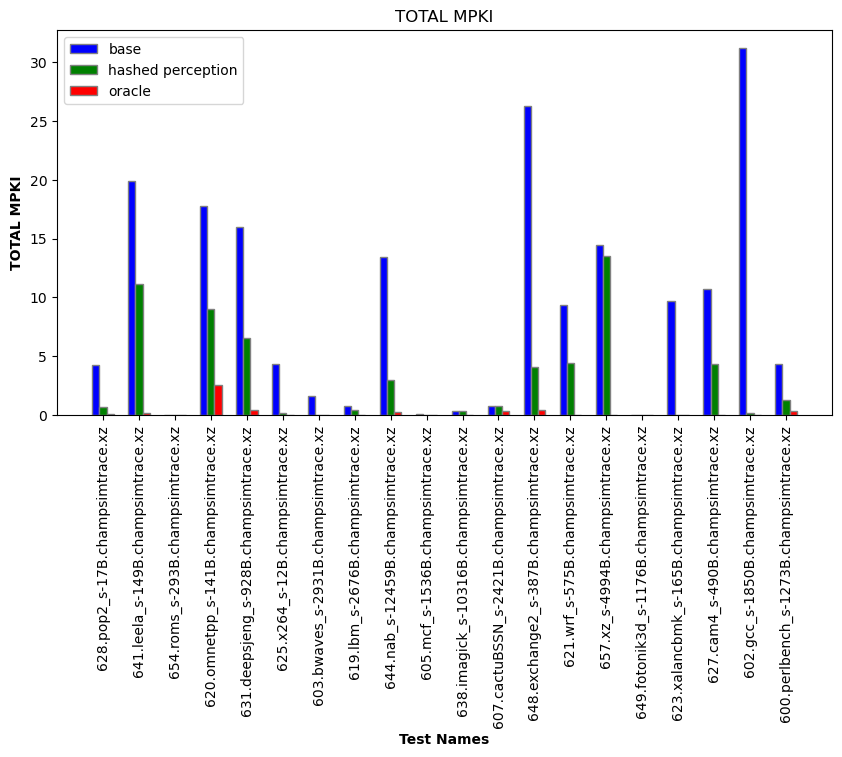

In [45]:
plot_metric([base_metrics, hp_metrics, oracle_metrics], 1, "TOTAL MPKI", ["base", "hashed perception", "oracle"])

In [59]:
base_mpki_s = list(map(lambda x: x[1][1], base_metrics.items()))
oracle_mpki_s = list(map(lambda x: x[1][1], oracle_metrics.items()))
total = 0
for b, o in zip(base_mpki_s, oracle_mpki_s):
  total += b - o
print(f"Average difference between Oracle's and Hashed Perceptron's MKPI {total / len(base_mpki_s)}")

Average difference between Oracle's and Hashed Perceptron's MKPI 9.0158175


Сделав идеальный предиктор только для условных бранчей, MPKI не поднимается выше 4.

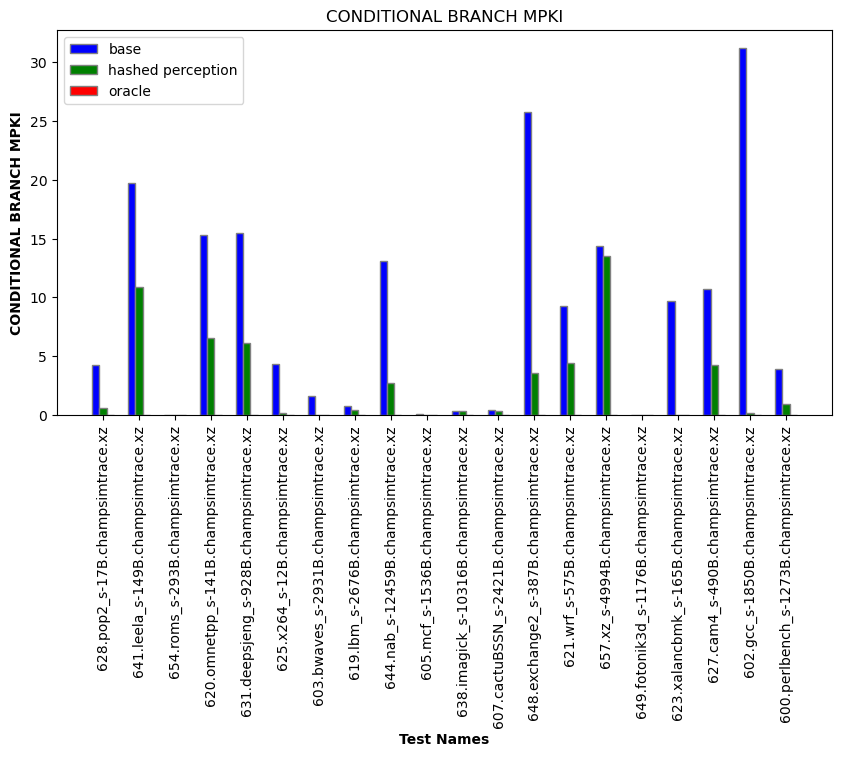

In [46]:
plot_metric([base_metrics, hp_metrics, oracle_metrics], 2, "CONDITIONAL BRANCH MPKI", ["base", "hashed perception", "oracle"])

MPKI для условных бранчей равен нулю. Достигнуто это модификацией стандартного BTB (показал ему будущее):

```c++
std::pair<uint64_t, uint8_t> O3_CPU::btb_prediction(uint64_t ip)
{
  auto &&cur_instr = input_queue.front();
  if (cur_instr.branch_type == BRANCH_CONDITIONAL) {
    return {cur_instr.branch_target, false};
  }
  // original code
  ...
}
```